# Predicting The Sale Price of Bulldozers Using Machine Learning

In this notebook, we're going to go through an example machine learning project with goal of predicting the sale price of Bulldozers

## 1. Problem Defination 
> How well can we predict the future sales price of a bulldozer, given it's characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
> Data have copyed from kaggle Bulebook
For this competition, you are predicting the sale price of bulldozers sold at auctions.

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set   throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale
There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.
The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).
## 3. Evaluation 
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

for more deatil follow :https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4. Features
We have the data dictionary kaggle has provided us:
https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [64]:
# Import the training and validation data
df = pd.read_csv('Data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [66]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

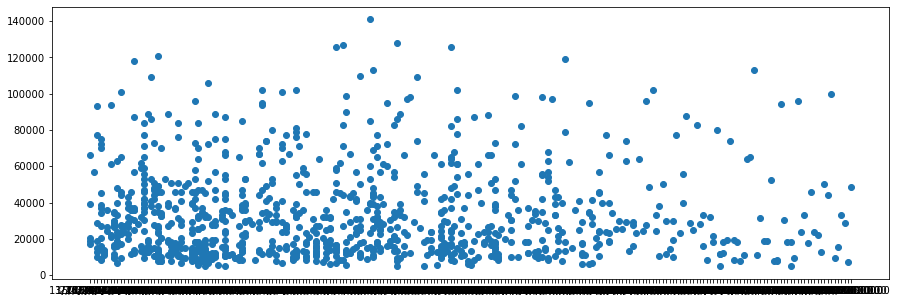

In [67]:
fig, ax = plt.subplots(figsize= (15,5))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

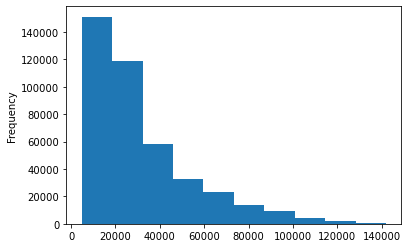

In [68]:
df.SalePrice.plot.hist();

### Parsing dates

When we work with series data , we want to enrich the time & date Component as much as possible

We can so that by telling pandas which of the columns have dates in them using the `parse_dates` parameter.

In [69]:
# Importing the again with parse_dates
df = pd.read_csv('Data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory = False, parse_dates = ['saledate'])

In [70]:
df.saledate.dtype

dtype('<M8[ns]')

In [71]:
df.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412697,6333349,13000.0,1944743,21436,149,2.0,2006,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


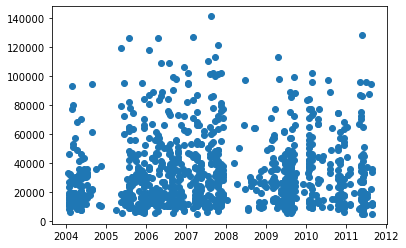

In [72]:
fig, ax =plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

### Sort DataFrame by saledate
When working with timeseries data , it's a good idea to sort it by date.

In [73]:
# Sort DataFrame in data order
df.sort_values(by = ['saledate'], inplace=True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe
we make a copy of the dataframe so when we manipulate the copy , we;ve still got our original data..

In [74]:
# Make a copy 
df_temp = df.copy()

### Add dateTime parameter for `saledate` column

In [77]:
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [78]:
# Add datetime parameters for saledate
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayofweek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayofyear"] = df_temp.saledate.dt.dayofyear

# Drop original saledate
df_temp.drop("saledate", axis=1, inplace=True)

## 5.Modeliing
We've done enough EDA (We could always do more) but let's start to do some model-driven EDA

In [79]:
# Let's Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42)
model.fit(df_temp.drop('SalePrice', axis=1), df_temp['SalePrice'])

ValueError: could not convert string to float: 'Low'

**Before modelling we need to convert the data into numeric form**

In [80]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [81]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### Convert string to categrories
One way we can turn all our data into numbers is by converting them into pandas categories

In [82]:
pd.api.types.is_string_dtype(df_temp['UsageBand'])
# This means it is the string

True

In [83]:
# These labels contains the string
for key,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(key)
len(content)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


412698

In [84]:
# This will turn all of the string values into category values 
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [85]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [86]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [87]:
df_temp.state.cat.codes
# We have converted string to categories

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

**Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.**

But we still have a bunch of missing data

In [88]:
# Check missing data
df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [89]:
# Export current tmp dataframe
df_temp.to_csv('Data/bluebook-for-bulldozers/train_tmp.csv', index = False)

In [90]:
# Import preprocessed data
df_temp = pd.read_csv('Data/bluebook-for-bulldozers/train_tmp.csv', low_memory =False)

In [91]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Fill Missing values

#### Fill missing values first

In [92]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [93]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [94]:
# Fill the numeric value with the Median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        # Add a binary column which tells us if the data was missing or not
        df_temp[label+'_is_missing'] = pd.isnull(content)
        # Fill missing numeric values with median
        df_temp[label] = content.fillna(content.median())
        # Median is more robust then the mean

In [95]:
# Check if any numeric values are yet to be filled
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)

In [96]:
# Check to see how many examples were missing
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [97]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical veriables into numbers

In [98]:
# Check for columns which aren't numeric 
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [99]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing values or not
        df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into number and add +1 
        df_temp[label] = pd.Categorical(content).codes+1
        # Why +1 because `pandas` convert null = -1, so +1 will make it `0`

In [55]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,True
Blade_Type_is_missing,False,True,False,True,True
Travel_Controls_is_missing,False,True,False,True,True
Differential_Type_is_missing,True,True,True,False,True


In [100]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

**Now That all of the data is numeric and no missing data , we should be able to make the machine learning model**

In [101]:
%%time
# Instantiate model 
model = RandomForestRegressor(n_jobs =-1, random_state= 42)

# Fit the Model
model.fit(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])

Wall time: 4min 6s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [102]:
# score the model
model.score(df_temp.drop('SalePrice', axis=1), df_temp['SalePrice'])

0.9875468079970562

In [103]:
df_temp.saleYear.value_counts()
# value_counts : is basically like hashing

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [104]:
# Split data into trianing and validation 
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [105]:
# split data into X & y
X_train , y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_val , y_val = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

In [106]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Build Your Own Evalution function

In [128]:
# Create evaluation function (the comprtetion Uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test, y_preds):
    """
    Calculate Root Mean Square Log Error b/t prediction and true Labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evalute model on a few differnt levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_val, val_preds),
             'Training RMSLE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_val, val_preds),
             'Training R^2': r2_score(y_train, train_preds),
             'Valid R^2': r2_score(y_val, val_preds)}
    return scores

### Testing our model on a subset(to tune the hyperparameter)

In [108]:
# This takes far to long.. for experminting
# %%time
# model = RandomForestRegressor(n_jobs = -1,random_state=42)

# model.fit(X_train, y_train)

In [109]:
len(X_train)

401125

In [111]:
# Change max_samples value
model= RandomForestRegressor(n_jobs =-1, random_state=42, max_samples=10000)

In [113]:
%%time 
# Cutting down on the max number of samples each estimator can see 10000 data
model.fit(X_train, y_train)

Wall time: 9.42 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [129]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV


In [134]:

%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 7min 1s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [135]:
# find the best model hyperparamter
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [136]:
# evalute the RandomSearch model
show_scores(rs_model)

{'Training MAE': 5878.89554074305,
 'Valid MAE': 7387.792464020661,
 'Training RMSLE': 0.26944510892960855,
 'Valid RMSLE': 0.3044403794979502,
 'Training R^2': 0.8471617833301588,
 'Valid R^2': 0.8274191082634755}

## Train a model with the best hyperparameters
**Note** : These were found after 100 iterations of `randomizedSearchCV`

In [137]:
%%time

# Note ideal hyperparameter
ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_leaf =1,
                                   min_samples_split = 14,
                                   max_features= 0.5,
                                   n_jobs = -1,
                                   max_samples = None)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 56.5 s
Parser   : 149 ms


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [138]:
# Score for ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2955.0558832440274,
 'Valid MAE': 5961.913043475546,
 'Training RMSLE': 0.14457287014034415,
 'Valid RMSLE': 0.24647139137050578,
 'Training R^2': 0.9588099712562983,
 'Valid R^2': 0.881009255711329}

In [139]:
# score on rs_model (only trained on 10,000 samples)
show_scores(rs_model)

{'Training MAE': 5878.89554074305,
 'Valid MAE': 7387.792464020661,
 'Training RMSLE': 0.26944510892960855,
 'Valid RMSLE': 0.3044403794979502,
 'Training R^2': 0.8471617833301588,
 'Valid R^2': 0.8274191082634755}

### Make prediction on test data

In [160]:
# Import the test data
df_test = pd.read_csv('Data/bluebook-for-bulldozers/Test.csv',low_memory=False, parse_dates= ['saledate'])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [141]:
# Make predicts on test dataset
test_preds = ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

## Preprocessing the data

Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Remember: Whatever you do to the training data, you have to do to the test data.

Let's create a function for doing so (by copying the preprocessing steps we used above).

In [161]:
def preprocess(df):
    df_test['saleYear'] = df_test['saledate'].dt.year
    df_test['saleDay'] = df_test['saledate'].dt.day
    df_test['saleMonth'] = df_test['saledate'].dt.month
    df_test['saleDayofweek']= df_test['saledate'].dt.dayofweek
    df_test['saleDayofyear'] = df_test['saledate'].dt.dayofyear
    
    # Drop the original sale date
    df_test.drop('saledate', axis = 1, inplace =True)
    
    # Fill the numeric columns with median
    for label,content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label+'_is_missing'] = pd.isnull(content)
                df_test[label] = content.fillna(content.median())
            
        # Fill the categorical with missing
        if not pd.api.types.is_numeric_dtype(content):
            df_test[label+'_is_missing'] = pd.isnull(content)
            df_test[label] = pd.Categorical(content).codes+1
    
    return df
            

In [162]:
df_test = preprocess(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [163]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [164]:
# finding the missing columns in the test data set
temp = set([])
for i in df_test:
    temp.add(i)
for i in df_temp:
    if i not in temp:
        print(i)
# set(X_train.columns)- set(df_test.columns)

SalePrice
auctioneerID_is_missing


In [165]:
# Add manually df_test
df_test['auctioneerID_is_missing']=False

In [166]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


**Finally aour test DataFrame is same as train DataFrame so we can make prediction**

In [168]:
# Make pridiction on test data
test_preds = ideal_model.predict(df_test)

In [169]:
len(test_preds)

12457

In [170]:
# Format predictions into same format kaggle is asking for
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,21253.534845
1,1227844,19733.320259
2,1227847,49356.330888
3,1227848,67942.400079
4,1227863,42484.657936
...,...,...
12452,6643171,49162.730690
12453,6643173,18156.548816
12454,6643184,15284.811329
12455,6643186,22354.853920


In [173]:
# Export prediction data to csv
df_preds.to_csv('Data/bluebook-for-bulldozers/test_prediction.csv', index=False)